<a href="https://colab.research.google.com/github/AurelienCD/Formation_OCR_Ing_Machine_Learning/blob/main/P2_02_notebookexploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Connexion au google drive, déplacement dans le dossier contenant les données nécessaires au projet

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2

[Errno 2] No such file or directory: 'drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2'
/content/drive/MyDrive/Formation_OCR_Ing_Machine_Learning/Projet 2


Importation des librairies nécessaires au projet

In [ ]:
!pip install scikit-posthocs

In [ ]:
import pandas as pad 
import statistics
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scikit_posthocs as sp

import statsmodels.api as sm
from statsmodels.formula.api import ols

import statsmodels.stats.multicomp as multi 

import functions #fonctions OCR pour les répresentations de l'ACP

In [ ]:
df = pad.read_csv('data_projet2_clean.csv', sep='\t')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Exploration rapide des données

In [ ]:
df.shape

(320772, 13)

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore
0,3087.0,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530.0,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0
2,4559.0,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0
3,16087.0,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0
4,16094.0,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN


# Création des variables d'intérêt :
  - « Produce_in_UE » (information si production en Union-Européene)
  - « Theoric_carbon_footprint » (information sur l’empreinte carbone théorique)
  - « Organic » (information si production en Union-Européene)


In [ ]:
liste_pays_europe = ["Allemagne", "Royaume-Uni", "France", "Slovénie", "Pays-Bas", "Belgique", "Espagne", "Suisse", "Irlande", "Portugal", "Roumanie", "Italie", "Moldavie", "Scotland", "Serbie", "Pologne", "Grèce", "République tchèque", "Hongrie", "Bulgarie", "Danemark", "Suède", "Norvège", "Slovaquie", "Ukraine", "Island", "Autriche", "Luxembourg"]
df['Produce_in_UE'] = np.where(df['countries'].isin(liste_pays_europe), True, False)

In [ ]:
df['Produce_in_UE'].value_counts()

False    186461
True     134311
Name: Produce_in_UE, dtype: int64

Ajouter une nouvelle colonne nous informant sur l'empreinte carbonne théorique (suivant documentations/sources fiables) d'une alimentation annuelle (en tCO2/an) consommant ce type de produit en se basant sur la nouvelle colonne df['Produce_in_UE']

In [ ]:
df['Empreinte_carbonne_théorique'] = np.where(df['Produce_in_UE'] == True, 0.31, 0.48)

Ajouter une nouvelle colonne "*Organic_product*" en se basant sur la variable "*product_name*"

In [ ]:
bio_list = ["Organic", "organic", "biologique", "organisch", "organico"]
df['Organic_product'] = df['product_name'].str.contains('|'.join(bio_list))
df['Organic_product'].value_counts()

False    293021
True       9762
Name: Organic_product, dtype: int64

Vérification des variables crées

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore,Produce_in_UE,Empreinte_carbonne_théorique,Organic_product
0,3087.0,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.31,False
1,4530.0,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0,False,0.48,False
2,4559.0,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0,False,0.48,False
3,16087.0,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0,False,0.48,True
4,16094.0,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,False,0.48,True


# Analyse univariée de chaques variables

### Exploration globale des variables quantitatives d'intérêt

Le but ici de ces premières analyses est de comprendre le comportement des variables

In [ ]:
## POUR CHANGER COULEUR sns.set_palette("bright") 
custom_palette = [sns.xkcd_rgb["windows blue"], sns.xkcd_rgb["pale red"], sns.xkcd_rgb["medium green"], "orange", "blue","yellow", "purple", "deeppink", "brown", "teal", "black"] 
sns.set_palette(custom_palette) 

In [ ]:
## Possibilité de faire un pairplot pour visualiser les données mais long vu le nombre de données et pas très informatif car il y a trop de données
#list_of_quantitative_variables_to_analyse = ["energy", "fat", "saturated-fat", "carbohydrates", "sugars", "fiber", "proteins", "salt", "nutriscore"]
#dfQ = df[list_of_quantitative_variables_to_analyse]
#sns.pairplot(dfQ)

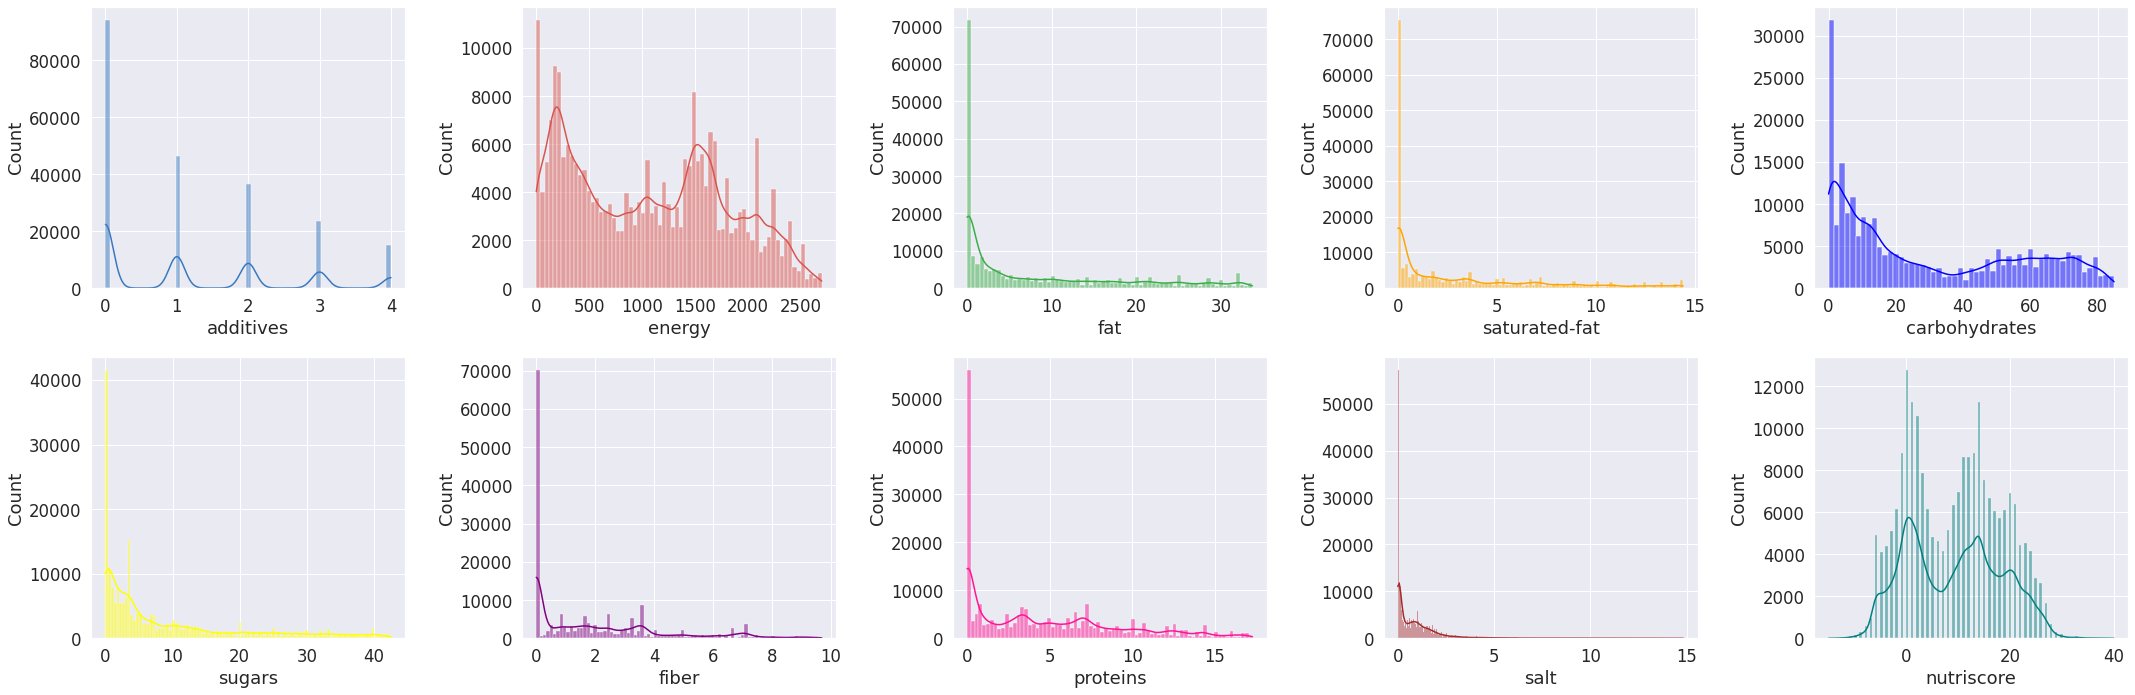

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.histplot(data=df, x="additives", kde=True, ax=axs[0, 0], color = custom_palette[0])
sns.histplot(data=df, x="energy", kde=True, ax=axs[0, 1], color = custom_palette[1])
sns.histplot(data=df, x="fat", kde=True, ax=axs[0, 2], color = custom_palette[2])
sns.histplot(data=df, x="saturated-fat", kde=True, ax=axs[0, 3], color = custom_palette[3])
sns.histplot(data=df, x="carbohydrates", kde=True, ax=axs[0, 4], color = custom_palette[4])
sns.histplot(data=df, x="sugars", kde=True, ax=axs[1, 0], color = custom_palette[5])
sns.histplot(data=df, x="fiber", kde=True, ax=axs[1, 1], color = custom_palette[6])
sns.histplot(data=df, x="proteins", kde=True, ax=axs[1, 2], color = custom_palette[7])
sns.histplot(data=df, x="salt", kde=True, ax=axs[1, 3], color = custom_palette[8])
sns.histplot(data=df, x="nutriscore", kde=True, ax=axs[1, 4], color = custom_palette[9])

plt.tight_layout()
fig.savefig("Global_exploration_quantitative_variables", dpi=400)
plt.show()

L'analyse par histogramme montre qu'il y a globalement moins de produits avec un nombre important d'additifs et avec les variable *energy*, *carbohydrates* et *nutriscore* qu'il existe deux (voir trois avec le *nutriscore*) populations/groupes d'aliment

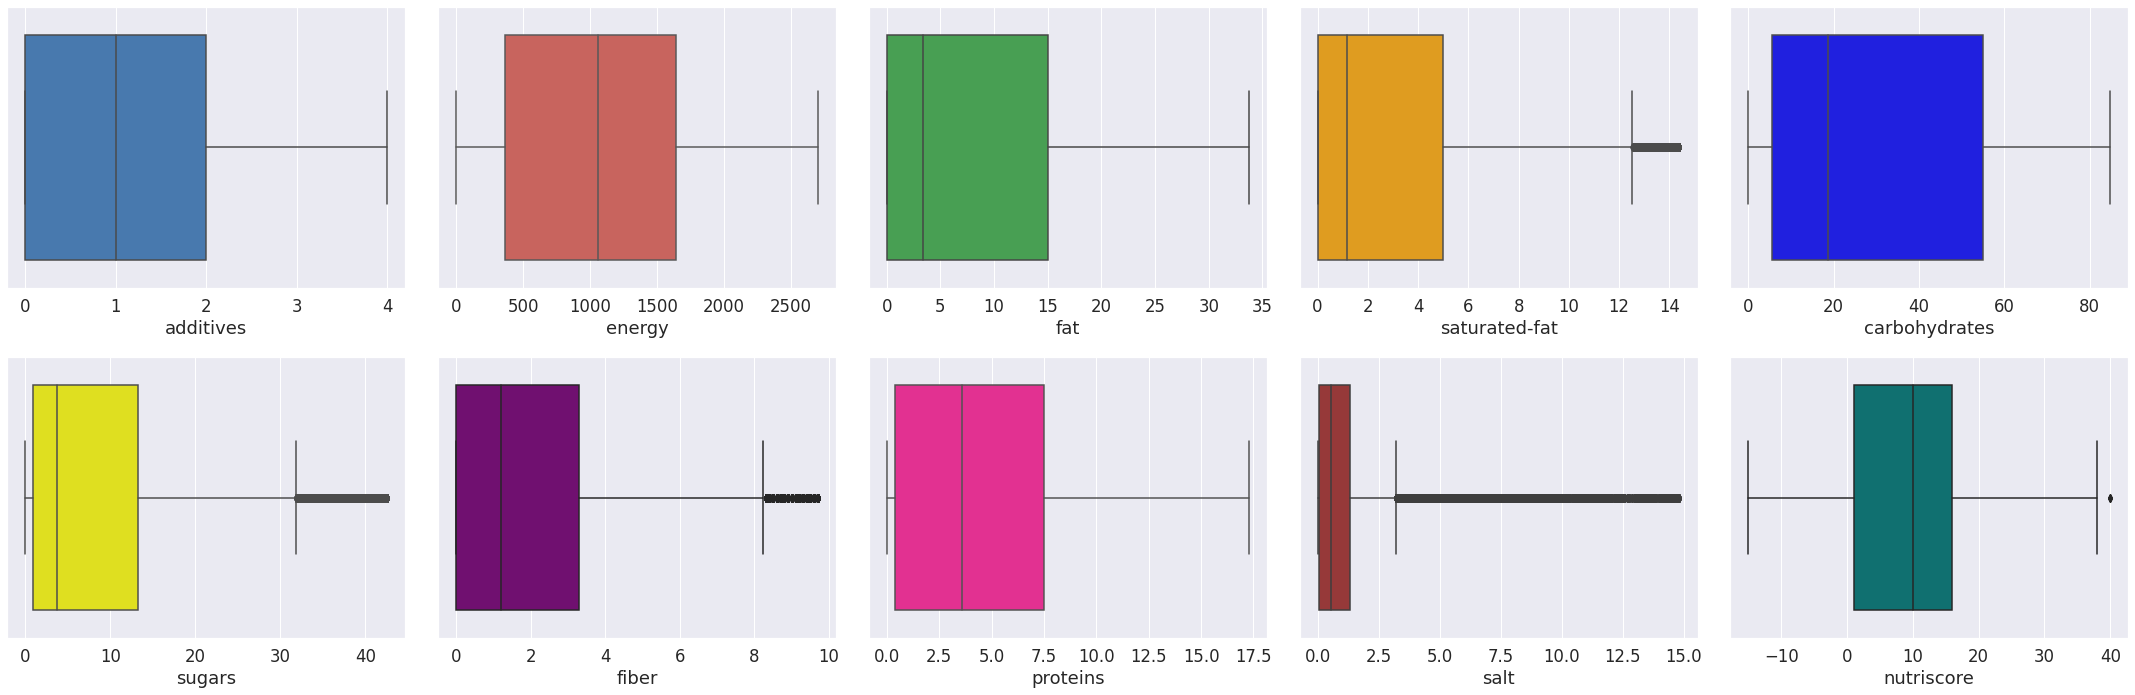

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30, 10))

sns.boxplot(data=df, x="additives", ax=axs[0, 0], color = custom_palette[0])
sns.boxplot(data=df, x="energy", ax=axs[0, 1], color = custom_palette[1])
sns.boxplot(data=df, x="fat", ax=axs[0, 2], color = custom_palette[2])
sns.boxplot(data=df, x="saturated-fat", ax=axs[0, 3], color = custom_palette[3])
sns.boxplot(data=df, x="carbohydrates", ax=axs[0, 4], color = custom_palette[4])
sns.boxplot(data=df, x="sugars", ax=axs[1, 0], color = custom_palette[5])
sns.boxplot(data=df, x="fiber", ax=axs[1, 1], color = custom_palette[6])
sns.boxplot(data=df, x="proteins", ax=axs[1, 2], color = custom_palette[7])
sns.boxplot(data=df, x="salt", ax=axs[1, 3], color = custom_palette[8])
sns.boxplot(data=df, x="nutriscore", ax=axs[1, 4], color = custom_palette[9])
plt.tight_layout()
fig.savefig("Global_exploration_quantiatives_variables", dpi=400)
plt.show()

L'analyse par boxplot nous montre les valeurs médianes, les quartiles ainsi que les outliers qui sont des valeurs correctes mais sur lesquelles il faut avoir une attention particulière

In [ ]:
df.describe()

,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore,Empreinte_carbonne_théorique
count,216030.000000,254597.000000,219575.000000,204048.000000,233292.000000,212292.000000,188107.000000,229029.000000,251445.000000,220995.000000,320772.000000
mean,1.163718,1073.068107,8.314744,3.007785,29.448797,9.077430,1.975772,4.747529,0.969204,9.166361,0.408819
std,1.284912,732.118284,9.959610,3.875747,26.828992,11.061404,2.304471,4.558404,1.452724,9.056223,0.083869
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.310000
25%,0.000000,368.000000,0.000000,0.000000,5.420000,0.880000,0.000000,0.400000,0.060000,1.000000,0.310000
50%,1.000000,1059.000000,3.400000,1.150000,18.660000,3.700000,1.200000,3.570000,0.551180,10.000000,0.480000
75%,2.000000,1644.000000,15.000000,5.000000,54.930000,13.270000,3.300000,7.500000,1.315720,16.000000,0.480000
max,4.000000,2700.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.270000,14.815820,40.000000,0.480000


Exploration gloable des variables qualitatives d'intérêt

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore,Produce_in_UE,Empreinte_carbonne_théorique,Organic_product
0,3087.0,France,Farine de blé noir,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,0.31,False
1,4530.0,États-Unis,Banana Chips Sweetened (Whole),0.0,2243.0,28.57,NaN,64.29,14.29,3.6,3.57,0.00000,14.0,False,0.48,False
2,4559.0,États-Unis,Peanuts,0.0,1941.0,17.86,0.00,60.71,17.86,7.1,NaN,0.63500,0.0,False,0.48,False
3,16087.0,États-Unis,Organic Salted Nut Mix,0.0,2540.0,NaN,5.36,17.86,3.57,7.1,NaN,1.22428,12.0,False,0.48,True
4,16094.0,États-Unis,Organic Polenta,0.0,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,False,0.48,True


<Figure size 432x288 with 0 Axes>

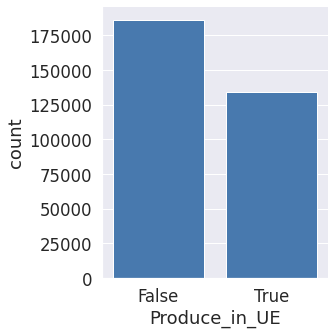

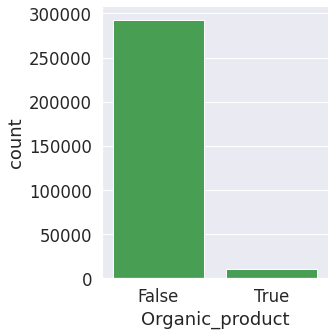

In [ ]:
fig = plt.figure()
ax1 = sns.catplot(data=df, x="Produce_in_UE", kind="count", color = custom_palette[0])
ax2 = sns.catplot(data=df, x="Organic_product", kind="count", color = custom_palette[2])
ax1.savefig("Global_exploration_Produce_in_UE", dpi=400)
ax2.savefig("Global_exploration_Organic_Product", dpi=400)

Représentation diagramme circulaire variables qualitatives

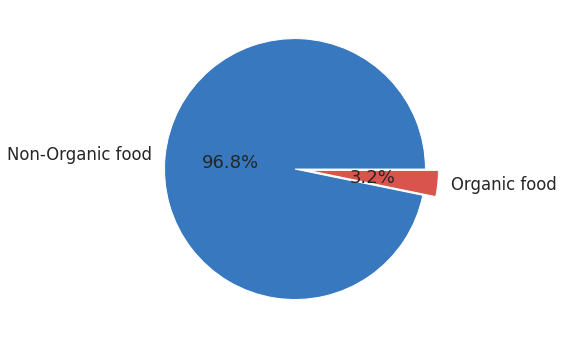

In [ ]:
data = df['Organic_product'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Non-Organic food", "Organic food")
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
pie.savefig("Proportion of organic food.png")

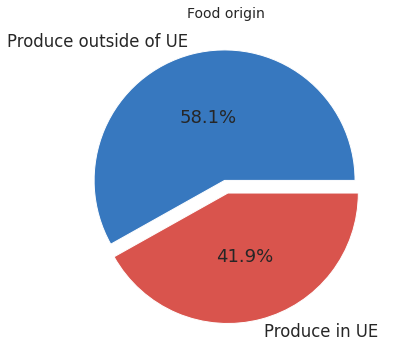

In [ ]:
data = df['Produce_in_UE'].value_counts()
pie, ax = plt.subplots(figsize=[10,6])
labels = ("Produce outside of UE", "Produce in UE")
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Food origin", fontsize=14);
pie.savefig("Food_origin_circ_diag.png")

# Analyse mulitvariées de chaques variables

Etant donnée que l'on veut comparer les données des variables entre elles (données appariées) on supprimer les lignes qui ont des NaN :

In [ ]:
df.dropna(inplace= True)

In [ ]:
df.shape

(93694, 16)

Visualisation gloable des corrélations/liens entre les variables quantitatives

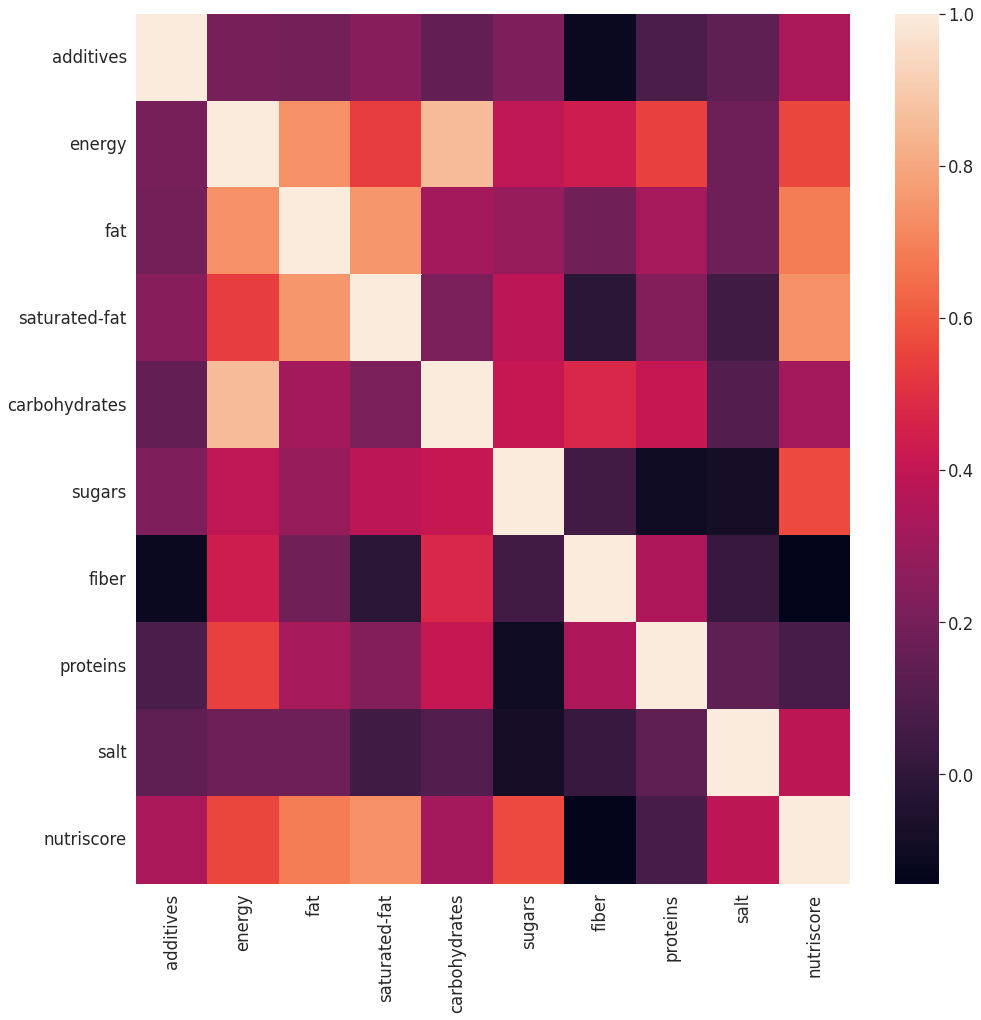

In [ ]:
list_of_quantitative_variables_to_analyse = ["additives", "energy", "fat", "saturated-fat", "carbohydrates", "sugars", "fiber", "proteins", "salt", "nutriscore"]
dfQ = df[list_of_quantitative_variables_to_analyse]
dfQ.corr()
sns.set(font_scale=1.5)
plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr())
figure= ax.get_figure()
figure.savefig("heatmap_quantitative_variables", dpi=400)

Carte de corrélation avec les valeurs de R seulement si p_value significative

In [ ]:
dfQ.describe()

,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore
count,93694.00000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000
mean,1.30495,874.662407,7.467479,2.282001,30.006607,9.437099,2.129907,5.312347,0.915241,5.239001
std,1.30164,658.402800,8.799709,3.347703,25.795021,10.951434,2.181446,4.462795,1.287134,7.914175
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,0.00000,268.000000,0.100000,0.000000,8.000000,1.630000,0.000000,1.320000,0.101600,-1.000000
50%,1.00000,711.000000,3.330000,0.500000,18.670000,4.440000,1.600000,4.260000,0.645160,3.000000
75%,2.00000,1491.000000,12.860000,3.500000,53.850000,13.530000,3.400000,8.200000,1.200000,11.000000
max,4.00000,2690.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.240000,14.815820,33.000000


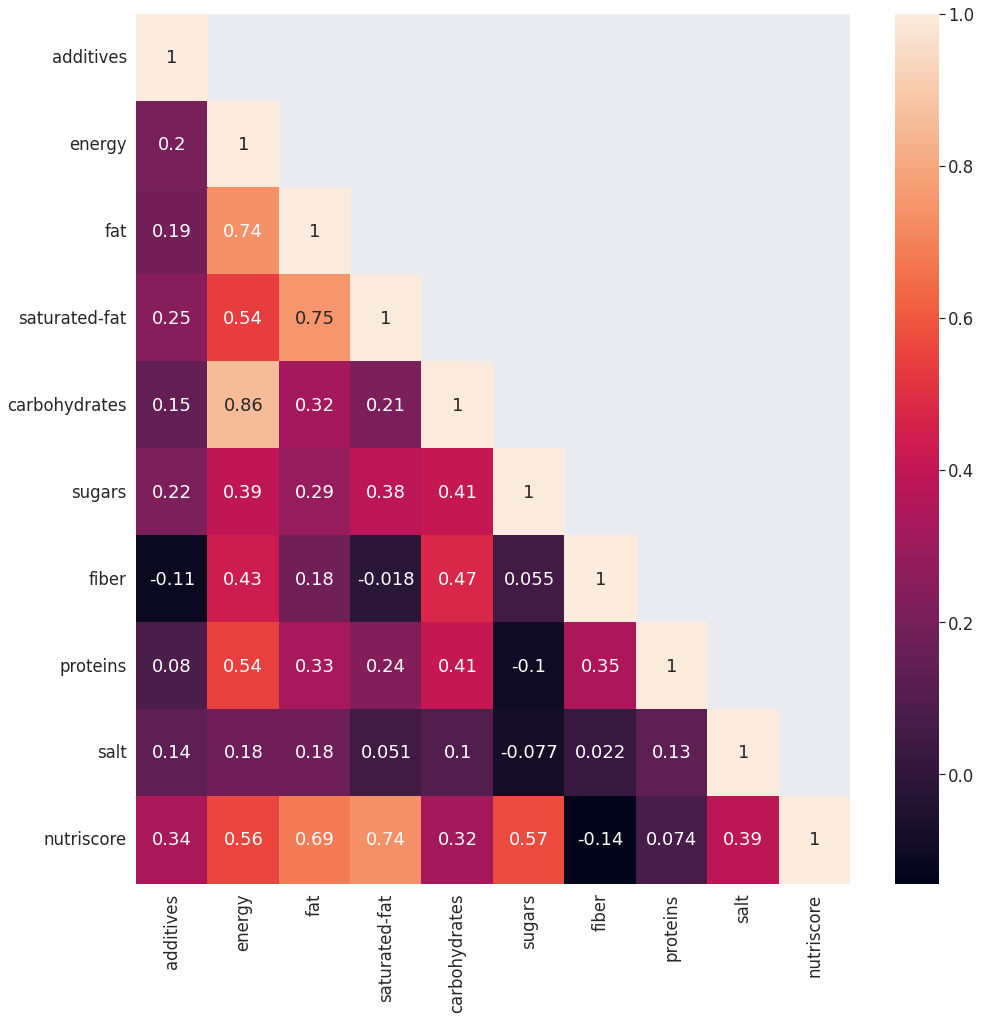

In [ ]:
def corr_sig(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			_ , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix

p_values = corr_sig(dfQ)                     # get p-Value
mask = np.invert(np.tril(p_values<0.001))    # mask - only get significant corr

plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
figure_pvalue= ax.get_figure()
figure_pvalue.savefig("heatmap_quantitative_variables_pvalue", dpi=400)

Carte de corrélation avec les valeurs de R seulement si p_value significative et si facteur de corrélation supérieur à 0.45

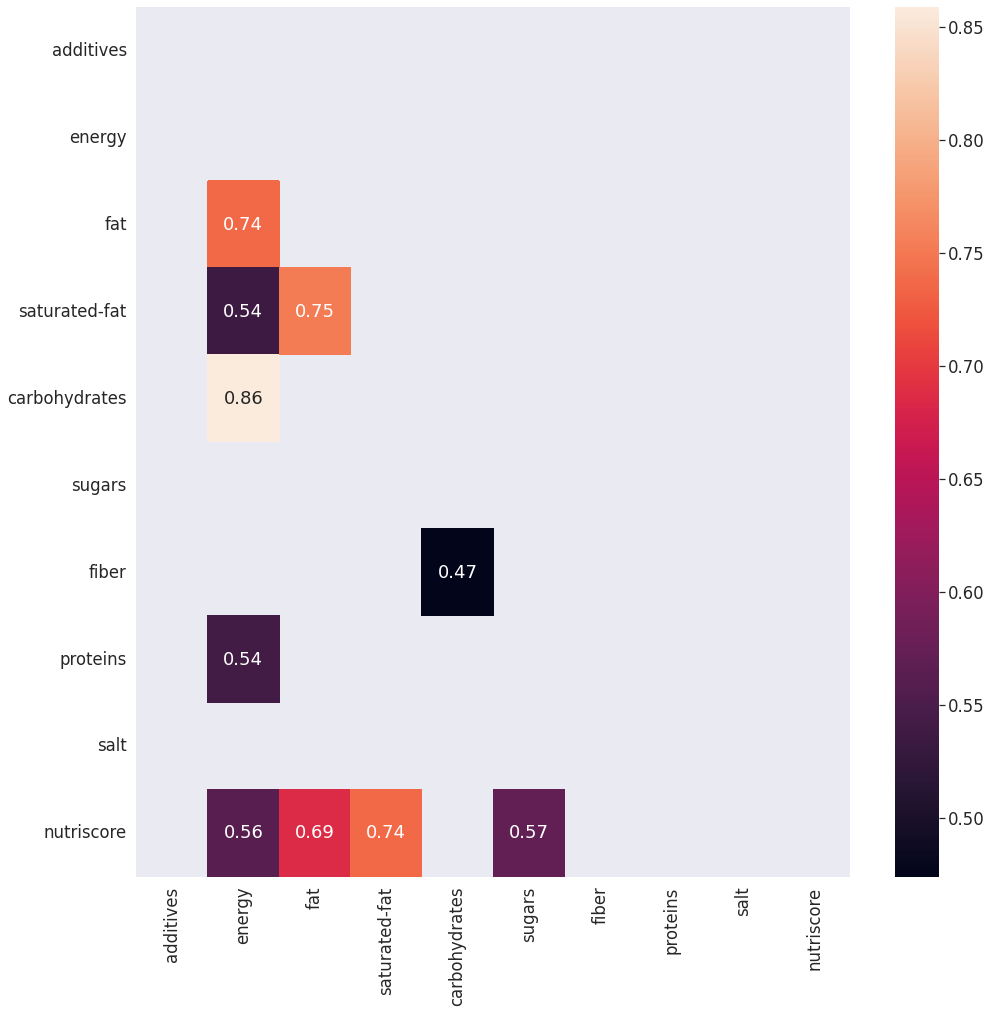

In [ ]:
def corr_corr(df=None):
	corr = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			corr[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = c
	return corr


def corr_pvalue(df=None):
	p_matrix = np.zeros(shape=(dfQ.shape[1],dfQ.shape[1]))
	for col in dfQ.columns:
		for col2 in dfQ.drop(col,axis=1).columns:
			c , p = stats.pearsonr(dfQ[col],dfQ[col2])
			p_matrix[dfQ.columns.to_list().index(col),dfQ.columns.to_list().index(col2)] = p
	return p_matrix


p_values = corr_pvalue(dfQ)                   # get p-values
corr = corr_corr(dfQ)                     # get R values
maskP = np.invert(np.tril(p_values<0.05))    # mask - only get significant corr
maskR = np.invert(np.tril(corr>0.45))
mask = maskP + maskR

plt.figure(figsize=(16, 16))
ax = sns.heatmap(dfQ.corr(), mask=mask, annot=True)
figure_pvalue_corr = ax.get_figure()
figure_pvalue_corr.savefig("heatmap_quantitative_variables_pvalue_corr", dpi=400)

## Analyse multivariée -- Aspect Santé

Calcul théorique du nutriscore :
Nutriments à limiter : **l’énergie**, **acides gras**, les **sucres**.
Nutriments à favoriser : les **fibres**, les **protéines**

Comment varie le nutri-score en fonction des éléments qui composent l'aliment ? Retrouve t-on la formule théorique ci-dessus ?

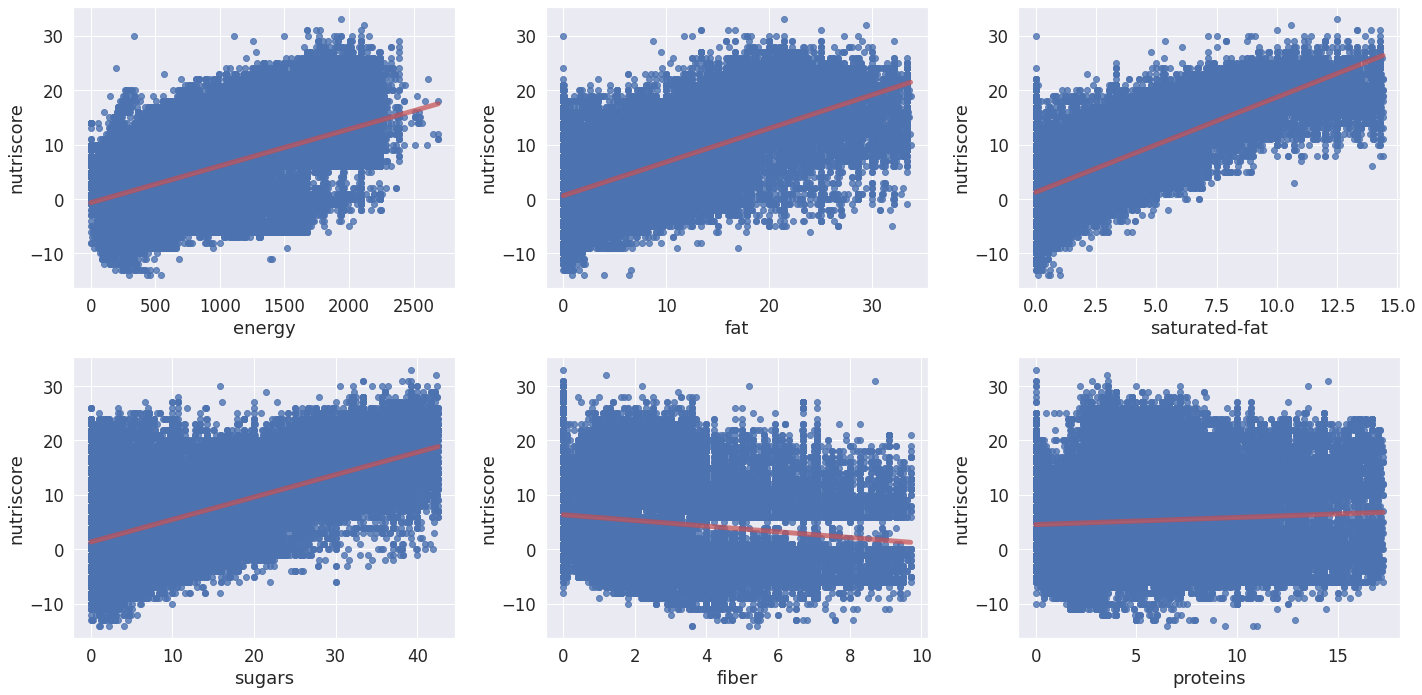

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

sns.regplot(x=df['energy'], y=df['nutriscore'], data=df, ax=axs[0, 0], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['fat'], y=df['nutriscore'], data=df, ax=axs[0, 1], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['saturated-fat'], y=df['nutriscore'], ax=axs[0, 2], data=df, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['sugars'], y=df['nutriscore'], data=df, ax=axs[1, 0], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['fiber'], y=df['nutriscore'], data=df, ax=axs[1, 1], line_kws={"color":"r","alpha":0.7,"lw":5})
sns.regplot(x=df['proteins'], y=df['nutriscore'], data=df, ax=axs[1, 2], line_kws={"color":"r","alpha":0.7,"lw":5})

plt.tight_layout()
fig.savefig("Correlation between variables and nutriscore", dpi=400)
plt.show()

Les variables "energy , fat, saturated-fat et sugars" sembles similaires et les fibres et protéines semblent inversement corrélés au nutriscore une PCA pourrait permettre d'en savoir un peu plus

In [ ]:
## Normalisation des données pour PCA
features = ['energy', 'fat', 'saturated-fat', 'sugars', 'fiber', 'proteins']
x = df.loc[:, features].values
y = df.loc[:,['nutriscore']].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(x)

In [ ]:
#nombre de composantes calculées
print(pca.n_components_) 

6


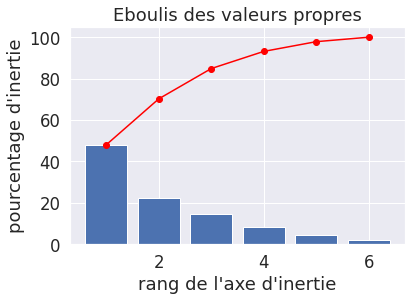

In [ ]:
#Eboulis des valeurs propres
functions.display_scree_plot(pca)

In [ ]:
# pourcentage de la variance expliquée pour chaque composantes
print('variance expliquée pour chaque composantes: %s' % str(pca.explained_variance_ratio_))

variance expliquée pour chaque composantes: [0.48064363 0.22172974 0.14623155 0.08283065 0.04702726 0.02153717]


In [ ]:
Variance = pca.explained_variance_ratio_
print("Variance avec une composante : " + str(Variance[0]))
print("Variance avec deux composantes : " + str(Variance[0]+Variance[1]))
print("Variance avec trois composantes : " + str(Variance[0]+Variance[1]+Variance[2]))

Variance avec une composante : 0.4806436317572984
Variance avec deux composantes : 0.7023733675601265
Variance avec trois composantes : 0.8486049210917153


Une seule composante ne suffit pas, trois composantes permettre d'arriver à 85%, ce qui semble acceptable.

In [ ]:
## Fabrication de la dataframe PCA avec 3 composantes
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pad.DataFrame(data = principalComponents, columns = ['principal component_1', 'principal component_2', 'principal component_3'])
dfNutri = df['nutriscore']
dfNutri.reset_index(inplace=True, drop=True)
PCAdf = pad.concat([principalDf, dfNutri], axis = 1)

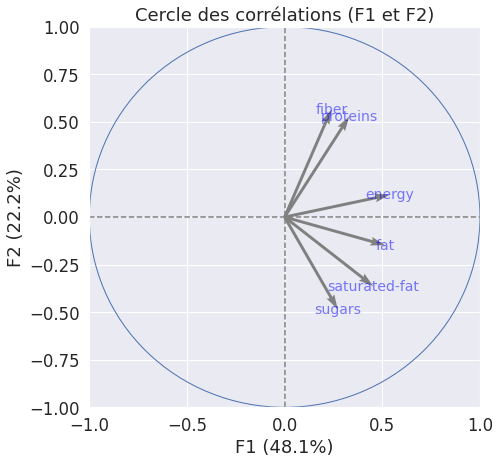

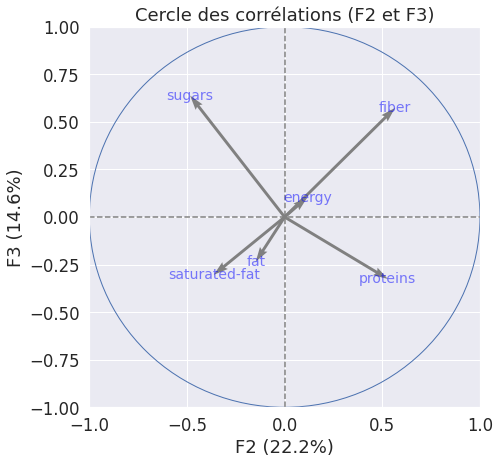

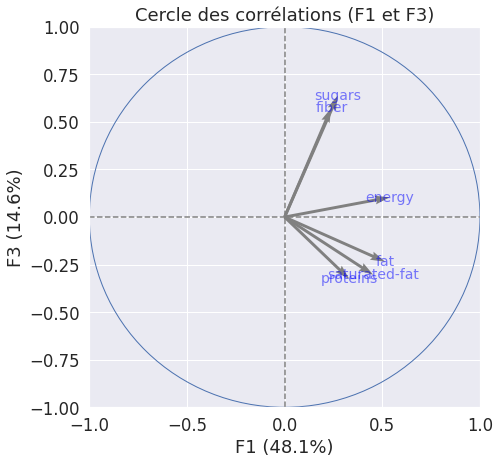

In [ ]:
## Fabrication du cercle de corrélations pour avoir une représentation des corrélations quantitatives avec le nutriscore
pcs = pca.components_
functions.display_circles(pcs, 3, pca, [(0,1), (1,2), (0,2)], labels = np.array(features))

### La PCA permet bien de comprendre comment est calculé le nutriscore.
On remarque que la composante F1 permet d'expliquer globalement comment se calcul le nutriscore, alors que la composante F2 expliquant 22.2% de la variance discrimine clairement ce qui est bon pour la santé (fibre/protéines) de ce qui n'est pas bon (sucre, graisses...)

In [ ]:
PCAdf.head()

,principal component_1,principal component_2,principal component_3,nutriscore
0,3.366387,2.364256,1.264652,7.0
1,3.094101,2.389820,1.785639,0.0
2,1.417619,3.748652,0.871699,-6.0
3,2.823928,-0.647165,1.290921,14.0
4,4.705852,0.529007,0.918987,15.0


In [ ]:
PCAdf.describe()

,principal component_1,principal component_2,principal component_3,nutriscore
count,9.369400e+04,9.369400e+04,9.369400e+04,93694.000000
mean,2.124418e-16,1.755627e-16,-2.347170e-16,5.239001
std,1.698203e+00,1.153426e+00,9.366956e-01,7.914175
min,-2.321395e+00,-3.696120e+00,-3.543878e+00,-14.000000
25%,-1.493226e+00,-7.346111e-01,-4.662128e-01,-1.000000
50%,-3.198233e-01,-6.646584e-02,-1.595857e-02,3.000000
75%,1.122483e+00,7.629262e-01,4.935059e-01,11.000000
max,6.182884e+00,3.927372e+00,4.264108e+00,33.000000


Observons la distribution de ces trois composantes

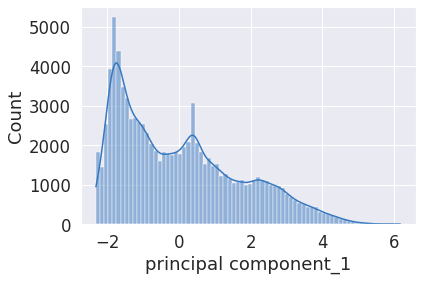

In [ ]:
ax = sns.histplot(data=PCAdf, x="principal component_1", kde=True, color = custom_palette[0])
fig = ax.get_figure()
fig.savefig("PC1_distribution", dpi=400)

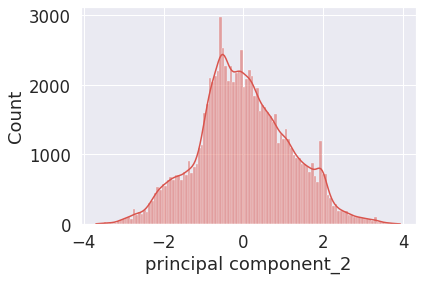

In [ ]:
ax = sns.histplot(data=PCAdf, x="principal component_2", kde=True, color = custom_palette[1])
fig = ax.get_figure()
fig.savefig("PC2_distribution", dpi=400)

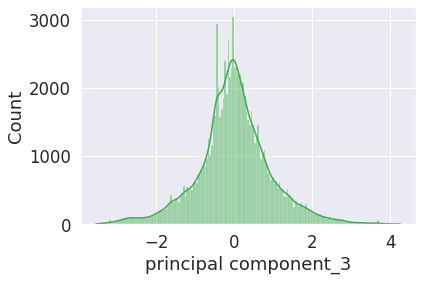

In [ ]:
ax = sns.histplot(data=PCAdf, x="principal component_3", kde=True, color = custom_palette[2])
fig = ax.get_figure()
fig.savefig("PC3_distribution", dpi=400)

L'objectif est maintenant de savoir s'il existe des différences entre des groupes, comme "il y a t-il une différence de nutriscore pour des produits bio et des produits non-bio ?"

Pour savoir si l'on pourra utiliser un test de student pour les analyses de différences, il faut s'assurer que les valeurs suivent une loi normale => test de *Shapiro*

In [ ]:
for elm in dfQ:
	result_shapiro = stats.shapiro(dfQ[elm])
	if result_shapiro[1]< 0.05:
		print(f"La variable {str(elm)} suit une loi normale (p = {str(result_shapiro[1])} )")
	if result_shapiro[1]> 0.05:
		print(f"La variable {str(elm)} ne suit pas une loi normale (p = {str(result_shapiro[1])} )")

La variable additives suit une loi normale (p = 0.0 )
La variable energy suit une loi normale (p = 0.0 )
La variable fat suit une loi normale (p = 0.0 )
La variable saturated-fat suit une loi normale (p = 0.0 )
La variable carbohydrates suit une loi normale (p = 0.0 )
La variable sugars suit une loi normale (p = 0.0 )
La variable fiber suit une loi normale (p = 0.0 )
La variable proteins suit une loi normale (p = 0.0 )
La variable salt suit une loi normale (p = 0.0 )
La variable nutriscore suit une loi normale (p = 0.0 )


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Fonction permettant de calculer une différence significative :

In [ ]:
def StudentTestSigni(df1,df2):
	"""Fonction permettant un test statistique classique (t test de student)"""
	student_test = ttest_ind(df1, df2)
	if student_test[1]< 0.05:
		print("Les valeurs sont significativement différentes (p = " + str(student_test[1]) + ")")
	elif student_test[1]> 0.05:
		print("Les valeurs ne sont pas significativement différentes (p = " + str(student_test[1]) + ")")

Un produit bio possède t-il forcement un bon score nutritionel ?

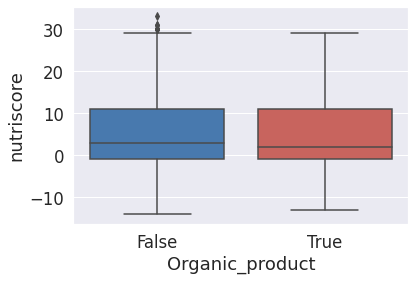

In [ ]:
ax = sns.boxplot(x=df['Organic_product'], y=df["nutriscore"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_bio-nutriscore", dpi=400)

In [ ]:
StudentTestSigni(df[df['Organic_product'] == False]["nutriscore"], df[df['Organic_product'] == True]["nutriscore"])

Les valeurs sont significativement différentes (p = 5.619008885067522e-215)


Un produit bio aura donc généralement un meilleur score nutritif, on peut dans le cadre de notre application utiliser ces deux variables pour construire notre score global

Un produit bio possède t-il forcement moins d'additif ?

Les valeurs sont significativement différentes (p = 0.0)


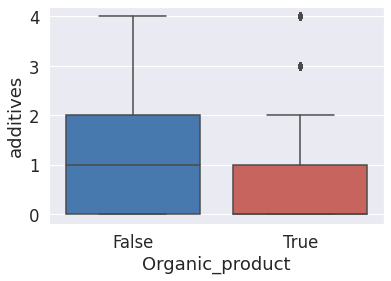

In [ ]:
ax = sns.boxplot(x=df['Organic_product'], y=df["additives"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_additifs", dpi=400)
StudentTestSigni(df[df['Organic_product'] == False]["additives"], df[df['Organic_product'] == True]["additives"])

Un produit bio aura donc généralement moins d'assitifs, on peut dans le cadre de notre application utiliser ces deux variables pour construire notre score global

## Analyse multivariée -- Aspect Planète

Un produit bio est-il forcement bon pour la planète ?

Les valeurs sont significativement différentes (p = 3.0835164967559097e-275)


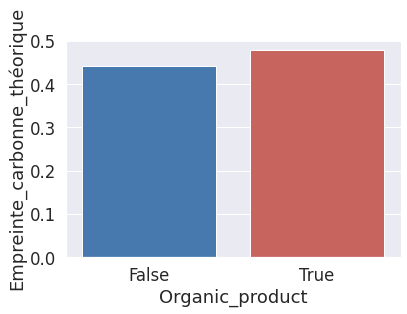

In [ ]:
ax = sns.barplot(x=df['Organic_product'], y=df["Empreinte_carbonne_théorique"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_bio-empreinte carbone", dpi=400)
StudentTestSigni(df[df['Organic_product'] == False]["Empreinte_carbonne_théorique"], df[df['Organic_product'] == True]["Empreinte_carbonne_théorique"])

Un produit bio est donc moins bon pour la planète dans le sens où il est produit généralement moins proche du consommateur, son empreinte carbon étant suppérieur (ici on ne prend cependant pas en compte le fait qu'il ne nécessite pas de pesticide qui n'est pas bon pour la planète non plus), pour le calcul de score général cet aspect sera pris en compte

Les aliments produits en UE sont-ils généralement meilleurs pour la santé (nutriscore moins élevé) ?

Les valeurs sont significativement différentes (p = 0.0)


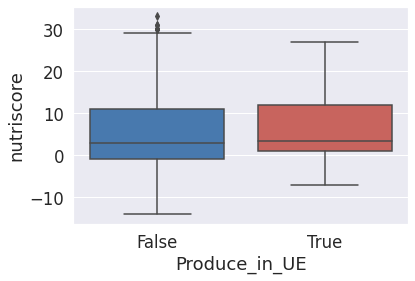

In [ ]:
ax = sns.boxplot(x=df['Produce_in_UE'], y=df["nutriscore"], palette = custom_palette)
fig = ax.get_figure()
fig.savefig("ttest_prod_UE-nutriscore", dpi=400)
StudentTestSigni(df[df['Produce_in_UE'] == False]["nutriscore"], df[df['Produce_in_UE'] == True]["nutriscore"])

Les aliments produits en UE sont généralement meilleurs pour la santé. Un produit bon pour la planète est généralement aussi bon pour la santé (si on ne prend pas en compte les pesticides des produits non-bio)

## Analyse multivariée -- Aspect Santé + Planète

In [ ]:
df.reset_index(inplace=True, drop=True)

Question : est-ce que le nutriscore permet de discriminer significativement les produits bon pour la santé et bon pour la planète ? 

Hypothèse H0 : le nutriscore permet de discriminer les produits entre eux suivant ces critères bio/planète.

Hypothèse H1 : le nutriscore ne permet pas de discriminer les produits entre eux suivant ces critères bio/planète.

Choix du test : J'ai une variable quantitative et une variable qualitative avec plusieurs modalités donc je fais une ANOVA.

Vérification des conditions de réalisation du test :  
  - les variances sont égales, cela je peux le savoir avec un test de levene :

In [ ]:
print(stats.levene(df.nutriscore[df.Produce_in_UE == True], df.nutriscore[df.Produce_in_UE == False]))
print(stats.levene(df.nutriscore[df.Organic_product == True], df.nutriscore[df.Organic_product == False]))

LeveneResult(statistic=295.2081402705489, pvalue=4.605154635425062e-66)
LeveneResult(statistic=717.1025132833316, pvalue=2.245224865800681e-157)


Les variances ne sont pas égales, je ne peux utiliser une ANOVA.

Je dois utiliser un test non-paramétrique, je choisi un test de type *Kurskal* :

In [ ]:
stats.kruskal(df['nutriscore'], df['Organic_product'], df['Produce_in_UE'])

KruskalResult(statistic=38041.194761261104, pvalue=0.0)

Il y a bien une différence entre les groupes mais à ce stade je ne sais pas entre quels groupes.
Pour aller plus loin je dois utiliser un posthoc pour savoir entre quels groupes est la différence significative :

In [ ]:
df['Organic_UE'] = df['Organic_product'].astype('str') + '_' + df['Produce_in_UE'].astype('str')

In [ ]:
result_score_nutriscore = sp.posthoc_mannwhitney(df, val_col='nutriscore', group_col='Organic_UE', p_adjust="Bonferroni")
result_score_nutriscore

,False_False,False_True,True_False,True_True
False_False,1.000000e+00,0.000000e+00,8.097054e-309,8.822847e-09
False_True,0.000000e+00,1.000000e+00,3.499529e-30,1.840526e-03
True_False,8.097054e-309,3.499529e-30,1.000000e+00,5.218578e-02
True_True,8.822847e-09,1.840526e-03,5.218578e-02,1.000000e+00


Les "*true*" et "*false*" du tableau ci-dessous correspondent à l'information si oui (true) ou non (false) les produits sont bio et produit dans l'UE. Une colonne "*False-False*" correspond donc à un produit non-bio et produit en dehors de l'Europe.

Pour plus de lisibilité pour les tests rejetés à p < 0.001, je transforme les dataframes avec les p-values par des dataframes accept/reject et je réorganise les index et colonnes :

In [ ]:
index_columns_dataframe_result = ["NoBio_NoUE", "NoBio_UE", "Bio_NoUE", "Bio_UE"]
pad.DataFrame(np.where(result_score_nutriscore > 0.001, "Reject", "Accept"), index = index_columns_dataframe_result, columns=index_columns_dataframe_result)

,NoBio_NoUE,NoBio_UE,Bio_NoUE,Bio_UE
NoBio_NoUE,Reject,Accept,Accept,Accept
NoBio_UE,Accept,Reject,Accept,Reject
Bio_NoUE,Accept,Accept,Reject,Reject
Bio_UE,Accept,Reject,Reject,Reject


On voit que le nutriscore permet de discrimer certaines conditions entre elles mais pas toutes (pas de différence entre produit non bio fabriqué en UE et un produit bio fabriqué en UE par exemple). Il sera donc intéressant de voir si notre score "bon pour soit et bon pour la planète" est plus relevant pour discriminer ces conditions

# Calcul des scores "*Score santé*" et "*Score planète*" ainsi que le "*Score général*"

 **Calcul du "*Score Santé*"**

*Valeur = nutriscore (norm 1-2) + Organic product (1 ou 2) + additives (norm 1-2)*

Normalisation des données pour calcul du score santé

In [ ]:
def normalisation_function(df):
  """Fonction de normalisation entre 1 et 2 pour calcul du score santé"""
  normalized_df=(df-df.min())/(df.max()-df.min())
  return normalized_df+1

In [ ]:
df["nutriscore"].min() ## avant de normaliser nutrition-score il ne faut avoir que des valeurs positives et pour cela il faut définir la valeur minimale

-14.0

In [ ]:
df["nutriscore_norm"] = df["nutriscore"]+14 ## j'ai rajouter le +14 car le nutriscore peut prendre des valeurs négatives
df["nutriscore_norm"] = normalisation_function(df["nutriscore_norm"])
df["nutriscore_norm"] = 1/df["nutriscore_norm"] ## car le nutriscore standard est inverse à la qualité de l'aliment (un score faible est un bon produit)
df["nutriscore_norm"] = normalisation_function(df["nutriscore_norm"])

In [ ]:
df["additives_norm"] = normalisation_function(df["additives"])

In [ ]:
df['score_santé'] = df["nutriscore_norm"] + df["additives_norm"] + np.where(df['Organic_product'] == True, 2, 1)

**Calcul du "*Score Planète*"**

*Valeur = Produce in UE (1 ou 2) + Organic product (1 ou 2)*

In [ ]:
df['score_planète'] = np.where(df['Produce_in_UE'] == True, 2, 1) + np.where(df['Organic_product'] == True, 2, 1)

**Calcul du "*Score Général*"**

*Valeur = Score Santé + Score Planète*

In [ ]:
df['score_général'] = df['score_santé'] + df['score_planète']

In [ ]:
df.head()

,code_bar,countries,product_name,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore,Produce_in_UE,Empreinte_carbonne_théorique,Organic_product,Organic_UE,nutriscore_norm,additives_norm,score_santé,score_planète,score_général
0,16124.0,États-Unis,Organic Muesli,2.0,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,7.0,False,0.48,True,True_False,1.382353,1.50,4.882353,3,7.882353
1,18012.0,États-Unis,Cinnamon Nut Granola,0.0,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.0,False,0.48,False,False_False,1.540984,1.00,3.540984,2,5.540984
2,18227.0,États-Unis,Organic Oat Groats,0.0,1096.0,5.95,1.19,66.67,2.38,9.5,16.67,0.02540,-6.0,False,0.48,True,True_False,1.709091,1.00,4.709091,3,7.709091
3,18265.0,États-Unis,Energy Power Mix,0.0,1464.0,17.50,7.50,42.50,32.50,5.0,7.50,0.28448,14.0,False,0.48,False,False_False,1.253333,1.00,3.253333,2,5.253333
4,18289.0,États-Unis,Antioxidant Mix - Berries & Chocolate,1.0,2092.0,33.33,6.67,46.67,30.00,6.7,13.33,0.46482,15.0,False,0.48,False,False_False,1.236842,1.25,3.486842,2,5.486842


In [ ]:
df.describe()

,additives,energy,fat,saturated-fat,carbohydrates,sugars,fiber,proteins,salt,nutriscore,Empreinte_carbonne_théorique,nutriscore_norm,additives_norm,score_santé,score_planète,score_général
count,93694.00000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000,93694.000000
mean,1.30495,874.662407,7.467479,2.282001,30.006607,9.437099,2.129907,5.312347,0.915241,5.239001,0.444011,1.438657,1.326238,3.816937,2.263742,6.080678
std,1.30164,658.402800,8.799709,3.347703,25.795021,10.951434,2.181446,4.462795,1.287134,7.914175,0.069448,0.164899,0.325410,0.367586,0.441897,0.628985
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000,0.310000,1.000000,1.000000,3.032967,2.000000,5.032967
25%,0.00000,268.000000,0.100000,0.000000,8.000000,1.630000,0.000000,1.320000,0.101600,-1.000000,0.480000,1.305556,1.000000,3.540984,2.000000,5.593220
50%,1.00000,711.000000,3.330000,0.500000,18.670000,4.440000,1.600000,4.260000,0.645160,3.000000,0.480000,1.468750,1.250000,3.742063,2.000000,5.902985
75%,2.00000,1491.000000,12.860000,3.500000,53.850000,13.530000,3.400000,8.200000,1.200000,11.000000,0.480000,1.566667,1.500000,4.040984,3.000000,6.468750
max,4.00000,2690.000000,33.720000,14.400000,84.850000,42.550000,9.700000,17.240000,14.815820,33.000000,0.480000,2.000000,2.000000,5.649123,4.000000,9.218750


Etude de la pertinence de notre score pour évaluer les différentes conditions que l'on souhaite étudier (vis à vis du nutriscore)

In [ ]:
print("\nPertinence du nutriscore : \n")
result_score_nutriscore = sp.posthoc_mannwhitney(df, val_col='nutriscore', group_col = 'Organic_UE', p_adjust="Bonferroni")
print(sp.posthoc_mannwhitney(df, val_col='nutriscore', group_col = 'Organic_UE', p_adjust="Bonferroni"))

print("\nPertinence du score général : \n")
result_score_general = sp.posthoc_mannwhitney(df, val_col='score_général', group_col = 'Organic_UE', p_adjust="Bonferroni")
print(sp.posthoc_mannwhitney(df, val_col='score_général', group_col = 'Organic_UE', p_adjust="Bonferroni"))


Pertinence du nutriscore : 

               False_False    False_True     True_False     True_True
False_False   1.000000e+00  0.000000e+00  8.097054e-309  8.822847e-09
False_True    0.000000e+00  1.000000e+00   3.499529e-30  1.840526e-03
True_False   8.097054e-309  3.499529e-30   1.000000e+00  5.218578e-02
True_True     8.822847e-09  1.840526e-03   5.218578e-02  1.000000e+00

Pertinence du score général : 

              False_False    False_True    True_False     True_True
False_False  1.000000e+00  0.000000e+00  0.000000e+00  2.396271e-34
False_True   0.000000e+00  1.000000e+00  0.000000e+00  2.727925e-34
True_False   0.000000e+00  0.000000e+00  1.000000e+00  1.232713e-33
True_True    2.396271e-34  2.727925e-34  1.232713e-33  1.000000e+00


Les "*true*" et "*false*" du tableau ci-dessous correspondent à l'information si oui (true) ou non (false) les produits sont bio et produit dans l'UE. Une colonne "*False-False*" correspond donc à un produit non-bio et produit en dehors de l'Europe.

Pour plus de lisibilité pour les tests rejetés à p < 0.001, je transforme les dataframes avec les p-values par des dataframes accept/reject et je réorganise les index et colonnes :

In [ ]:
result_score_general_final = pad.DataFrame(np.where(result_score_general > 0.001, "Reject", "Accept"), index = index_columns_dataframe_result, columns=index_columns_dataframe_result)
result_nutriscore_final = pad.DataFrame(np.where(result_score_nutriscore > 0.001, "Reject", "Accept"), index = index_columns_dataframe_result, columns=index_columns_dataframe_result)

In [ ]:
print("\nPertinence du nutriscore : \n")
print(result_nutriscore_final)

print("\nPertinence du score général : \n")
print(result_score_general_final)


Pertinence du nutriscore : 

           NoBio_NoUE NoBio_UE Bio_NoUE  Bio_UE
NoBio_NoUE     Reject   Accept   Accept  Accept
NoBio_UE       Accept   Reject   Accept  Reject
Bio_NoUE       Accept   Accept   Reject  Reject
Bio_UE         Accept   Reject   Reject  Reject

Pertinence du score général : 

           NoBio_NoUE NoBio_UE Bio_NoUE  Bio_UE
NoBio_NoUE     Reject   Accept   Accept  Accept
NoBio_UE       Accept   Reject   Accept  Accept
Bio_NoUE       Accept   Accept   Reject  Accept
Bio_UE         Accept   Accept   Accept  Reject


Notre score "bon pour soit et bon pour la planète" est plus relevant pour discriminer les différentes conditions que le nutriscore, cette idée d'application est donc faisable et pertinente

Fonction permettant de ressortir les scores en fonction du code barre

In [ ]:
def scores__calculator(code_barre):
  """Fonction de calcul du score santé en fonction du code barre fournit"""
  score_sante = round(float(df.loc[df['code_bar'] == code_barre, 'score_santé']),2)
  score_planete = round(float(df.loc[df['code_bar'] == code_barre, 'score_planète']),2)
  score_general = round(float(df.loc[df['code_bar'] == code_barre, 'score_général']),2)
  print("Le produit : '\x1B[3m" + str((df.loc[df['code_bar'] == code_barre, 'product_name']).values[0]) + "\x1B[0m' possède un :")
  print("Score santé de : " + str(score_sante))
  print("Score planète de : " + str(score_planete))
  print("Score général de : " + str(score_general))

In [ ]:
scores__calculator(18227)

Le produit : 'Organic Oat Groats' possède un :
Score santé de : 4.71
Score planète de : 3.0
Score général de : 7.71


In [ ]:
scores__calculator(18265)

Le produit : 'Energy Power Mix' possède un :
Score santé de : 3.25
Score planète de : 2.0
Score général de : 5.25
